20개의 카테고리로 구분되는 영어 뉴스 데이터셋을 이용해 뉴스 그룹을 분류

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/news/train.csv')
test = pd.read_csv('/content/drive/MyDrive/news/test.csv')

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
temp = train.target.unique()
temp

In [ ]:
np.sort(temp)

In [ ]:
# 결측치 존재 여부를 확인해주는 함수
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

In [ ]:
train.info()

In [ ]:
train.text

In [ ]:
#불필요한 문자 정리
import re 

def clean_text(texts): 
  corpus = [] 
  for i in range(0, len(texts)): 

    review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
    review = re.sub(r'\d+','', review)#숫자 제거
    review = review.lower() #소문자 변환
    review = re.sub(r'\s+', ' ', review) #extra space 제거
    review = re.sub(r'<[^>]+>','',review) #Html tags 제거
    review = re.sub(r'\s+', ' ', review) #spaces 제거
    review = re.sub(r"^\s+", '', review) #space from start 제거
    review = re.sub(r'\s+$', '', review) #space from the end 제거
    review = re.sub(r'_', ' ', review) #space from the end 제거
    corpus.append(review) 
  
  return corpus

In [ ]:
temp = clean_text(train['text'])
train['text'] = temp
train.head()

In [ ]:
val_count = train['target'].value_counts() #유니크값의 개수 확인
for i in range(0,20):
    print(f'리벨 {i}인 리뷰 개수:',val_count[i])

In [ ]:
#데이터 시각화
%matplotlib inline
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = train['target']

plt.figure(figsize=(10,7.5)) # 그래프 이미지 크기 설정
plt.suptitle("Bar Plot", fontsize=30) # 부제목과 폰트 크기 설정

plt.title('label', fontsize=20) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # 막대그래프 생성
plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

20가지 라벨 모두 300개가 넘고 19이 가장 적음

In [ ]:
str_len_mean = np.mean(train['text'].str.len()) # 리뷰 길이의 평균값 계산
print('뉴스의 평균 길이 :',round(str_len_mean,0))

In [ ]:
# 데이터 필터링을 위한 마스크 설정
for i in range(0, 20):
  globals()['mask_{}'.format(i)] = (train.target == i)

# 전체 및 그룹 집합을 설정합니다.
df_train = train.text.copy() # 전체 train 데이터

for i in range(0, 20):
  globals()['df_{}'.format(i)] = train.loc[globals()['mask_{}'.format(i)],:].text # 20가지 라벨 각각에 해당하는 데이터를 df0~19로 할당

# 스무가지로 나뉜 집합을 리스트로 묶어줍니다.
compare = [df_0, df_1, df_2, df_3, df_4, df_5, 
           df_6, df_7, df_8, df_9, df_10, df_11,
           df_12, df_13, df_14, df_15, df_16, df_17,
           df_18, df_19]

In [ ]:
df_0

In [ ]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(40,20))
plt.suptitle("Histogram: news length", fontsize=40)
name = ['alt.atheism',
        'comp.graphics',
        'comp.os.ms-windows.misc',
        'comp.sys.ibm.pc.hardware',
        'comp.sys.mac.hardware',
        'comp.windows.x',
        'misc.forsale',
        'rec.autos',
        'rec.motorcycles',
        'rec.sport.baseball',
        'rec.sport.hockey',
        'sci.crypt',
        'sci.electronics',
        'sci.med',
        'sci.space',
        'soc.religion.christian',
        'talk.politics.guns',
        'talk.politics.mideast',
        'talk.politics.misc',
        'talk.religion.misc'] # 제목으로 사용할 문자열 (라벨의 실제 이름)

for i in range(len(compare)):
    text = compare[i]
    string_len = [len(x) for x in text]    
    plt.subplot(5,4,i+1) # 행 개수/ 열 개수/ 해당 그래프 표시 순서
    plt.title(name[i], fontsize=20)
    plt.axis([0, 50000, 0, 10])  #x축 시작, 끝 / y축 시작, 끝
    plt.hist(string_len, alpha=0.5, color='orange') # 히스토그램 생성, alpha: 그래프의 투명도 조절
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import nltk # 영어에 대한 전처리
import pickle
from nltk.corpus import stopwords
from os import path
nltk.download('all')

In [ ]:
def df2str(df):
    
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
        document += s[i]
    return document

In [ ]:
# 워드 토큰화 :  nltk의 word_tokenize 메소드를 이용하여 토큰화
word_tokens = nltk.word_tokenize(df2str(df_0))

In [ ]:
# nltk의 pos_tag 메소드를 이용하여 품사분리를 진행
# pos_tag()의 입력값으로는 단어의 리스트가 들어가야 한다.
tokens_pos = nltk.pos_tag(word_tokens)

In [ ]:
# 명사만 추출
# 명사는 NN을 포함하고 있음을 알 수 있음
NN_words = []
for word, pos in tokens_pos:
    if 'NN' in pos:
        NN_words.append(word)

In [ ]:
# 품사 원형 찾기
# nltk에서 제공하는 WordNetLemmatizer() 메소드
# 명사의 경우 보통 복수 -> 단수 형태로 변형
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

In [ ]:
# 불용어 처리
# nltk에서 제공하는 불용어 기본 사전 이용하여 워드클라우드에 사용하지 않을 단어를 제거

stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)

In [ ]:
# 빈도분석
# 빈도수 상위 10개의 단어를 출력
from collections import Counter
c = Counter(final_NN_words)
k = 10

In [ ]:
c.most_common(k) # 빈도수 기준 상위 k개 단어 출력

In [ ]:
#시각화
top_10 = c.most_common(k) # 추출한 명사 중 상위 10개
keys = [top_10[i][0] for i in range(len(top_10))]
values = [top_10[i][1] for i in range(len(top_10))]

plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=30)
plt.title('total reviews', fontsize=20)
plt.bar(keys, values, width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# 워드클라우드

noun_text = ''
for word in final_NN_words:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(max_font_size=50, #가장 큰 폰트 크기 제한
                      width=500, #너비
                      height=300, #높이
                      background_color='white', #배경 색상
                      relative_scaling=.2 #상대적인 크기
                      ).generate(noun_text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

0번 뉴스 그룹 'alt.atheism'의 키워드가 다음과 같이 나와있음

'god', 'people', 'argument', 'time' 등 단어가 유즈넷 뉴스의 atheism (무신론) 그룹에서 많이 언급


*   임베딩(word embedding): 컴퓨터가 계산을 하기 위해서는 먼저 문장을 숫자형 값으로 바꾼 다음 계산
*   CountVectorizer: 입력된 문장을 토큰화(Tokenize)하여 토큰의 등장 빈도 벡터로 바꿔주는 기법
*  토큰화란 문장를 의미가 있는 최소의 단위로 쪼개는 것











In [ ]:
# CountVectorizer 사용하여 띄어쓰기 기준으로 토큰화
from sklearn.feature_extraction.text import CountVectorizer #sklearn 패키지의 CountVectorizer import

sample_vectorizer = CountVectorizer() #객체 생성

In [ ]:
# CountVectorizer 의 경우 단어의 출현 빈도를 기준으로 문장을 벡터(=숫자의 집합)로 바꿔준다
sample_text1 = ["hello, my name is dacon and I am a data scientist!"]

sample_vectorizer.fit(sample_text1) #CountVectorizer 학습

In [ ]:
print(sample_vectorizer.vocabulary_) #Vocabulary

sklearn의 CountVectorizer는 "I", "a" 와 같이 길이가 2 이하인 단어들과, ",", !" 같은 특수 문자를 의미가 적다고 판단하여 제외

In [ ]:
# sample_vectorizer 를 활용해 벡터로 transform

sample_text2 = ["you are learning dacon data science"]

sample_vector = sample_vectorizer.transform(sample_text2)
print(sample_vector.toarray())

단어들의 출현 빈도로 이루어진 크기 9의 백터가 출력되었습니다. 이 벡터를 BoW 라고 합니다.

BoW 란 "Bag of Words" 의 약자로 CountVectorizer 로 변환된 단어의 집합을 말합니다

특정 단어가 N번 등장했다면, 그 특정 단어가 N개가 들어있습니다.

또한 단어를 섞었기 때문에 더 이상 단어의 순서는 중요하지 않습니다.

BoW를 만드는 과정은 이렇게 두 가지 과정이 있습니다.

(1) 우선 각 단어에 고유한 정수 인덱스를 부여합니다.

(2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듭니다.

sample_text2 문장 내에는 "dacon", "data" 단어가 각 1번 씩 출현했습니다.

따라서 "dacon" 과 "data" 에 해당하는 인덱스의 값이 1로 표시되어 있고, 등장하지 않은 단어들은 0으로 표시되어 있습니다.

In [ ]:
sample_text3 = ["you are learning dacon data science with news data"]

sample_vector2 = sample_vectorizer.transform(sample_text3)
print(sample_vector2.toarray())

"you are learning dacon data science with news data" 문장에는 "dacon" 단어가 1번, "data" 단어가 2번 출현했습니다.

따라서 "dacon" 단어에 해당하는 인덱스에는 1의 값이, "data" 에 해당하는 인덱스에는 2의 값이 할당되었습니다.

CountVectorizer 는 위와 같이 작동합니다.

이해를 위해 CountVectorizer 를 하나의 문장을 사용해 학습 시켰기에 생성된 Vocab과 BoW 의 크기는 모두 9 였습니다.

하지만 더 큰 데이터를 사용해 CountVectorizer 를 학습시킨다면 Vocab과 Bow 의 크기는 더욱 증가할 것입니다.

이처럼 BoW는 각 단어가 등장한 횟수를 수치화하는 텍스트 표현 방법이기 때문에,

주로 어떤 단어가 얼마나 등장했는지를 기준으로 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰입니다.

즉, 분류 문제나 여러 문서 간의 유사도를 구하는 문제에 주로 쓰입니다.

In [ ]:
X = train.text #training 데이터에서 문서 추출
y = train.target #training 데이터에서 라벨 추출

In [ ]:
train.target

In [ ]:
X

In [ ]:
vectorizer = CountVectorizer() #countvectorizer 생성
vectorizer.fit(X) #countvectorizer 학습
X = vectorizer.transform(X) #transform

In [ ]:
vectorizer.inverse_transform(X[0]) #역변환하여 첫번째 문장의 단어들 확인

예측하고자 하는 것이 연속적인 값을 갖는 수치 형태가 아닌, 1 단위로 끊어지는 분류 문제이기 때문에

category를 분류할 때 사용하는 LogisticRegression을 이용하여 진행

In [ ]:
from sklearn.linear_model import LogisticRegression #모델 불러오기
model = LogisticRegression(max_iter=500) #객체에 모델 할당
model.fit(X, y) #모델 학습

In [ ]:
from sklearn.metrics import accuracy_score

#run model
y_pred = model.predict(X[0])
print('예측 라벨 : ', y_pred)
print('실제 라벨 : ', train.target[0])

X의 첫번째 문장은 10번 카테고리 그룹으로 잘 학습되어 분류된 것을 확인

In [ ]:
test_X = test.text #문서 데이터 생성

test_X_vect = vectorizer.transform(test_X) #문서 데이터 transform 
#test 데이터를 대상으로 fit_transform 메소드를 실행하는 것은 test 데이터를 활용해 vectorizer 를 학습 시키는 것으롤 data leakage 에 해당합니다.

pred = model.predict(test_X_vect) #test 데이터 예측
print(pred)

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/news/sample_submission.csv") #제출용 파일 불러오기
submission.head() #제출 파일이 잘 생성되었는지 확인

In [ ]:
submission["target"] = pred #예측 값 넣어주기
submission.head() # 데이터가 잘 들어갔는지 확인합니다.

In [ ]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
submission.to_csv("/content/drive/MyDrive/news/submission.csv",index=False)

로지스틱 회귀

로지스틱 회귀(Logistic Regression)는 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘

스팸 메일 분류기 같은 예시를 생각하면 쉽다. 어떤 메일을 받았을 때 그것이 스팸일 확률이 0.5 이상이면 spam으로 분류하고, 확률이 0.5보다 작은 경우 ham으로 분류하는 거다. 이렇게 데이터가 2개의 범주 중 하나에 속하도록 결정하는 것을 2진 분류(binary classification)라고 한다.


선형회귀

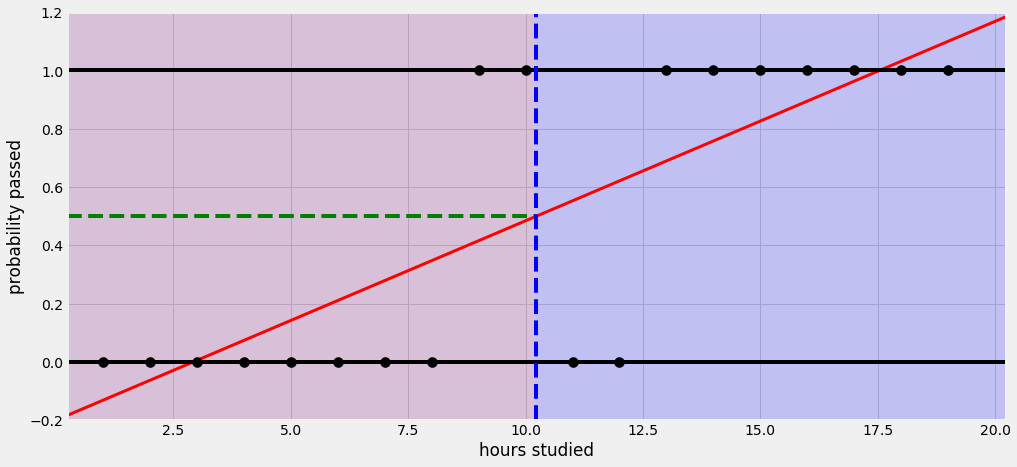

확률이 음과 양의 방향으로 무한대까지 

로지스틱 회귀

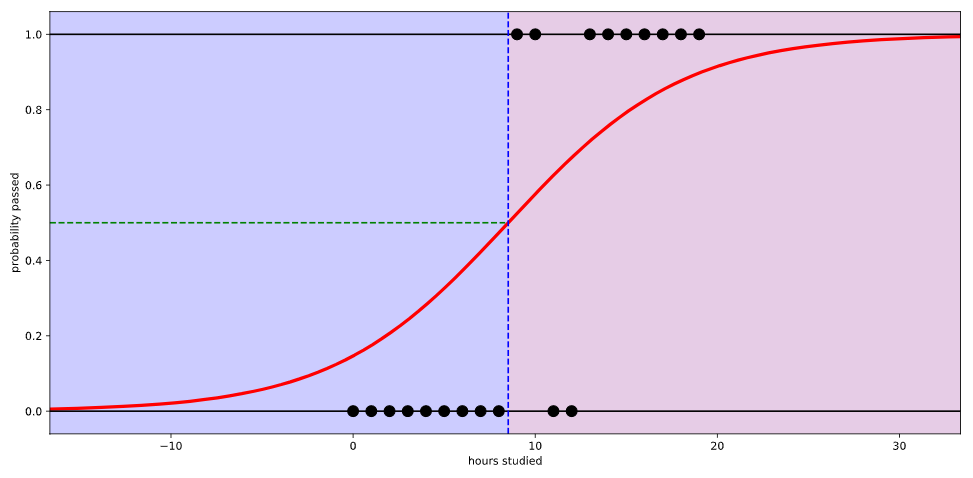

확률이 0과 1사이의 값

로지스틱 회귀에서는 데이터가 특정 범주에 속할 확률을 예측하기 위해 아래와 같은 단계를 거친다.

1. 모든 속성(feature)들의 계수(coefficient)와 절편(intercept)을 0으로 초기화한다.
2. 각 속성들의 값(value)에 계수(coefficient)를 곱해서 log-odds를 구한다.
3. log-odds를 sigmoid 함수에 넣어서 [0,1] 범위의 확률을 구한다.

https://hleecaster.com/ml-logistic-regression-concept/